Text(0.5, 1, 'Correlation coefficients between earthquake \n magnitude and whether there was a tsunami')

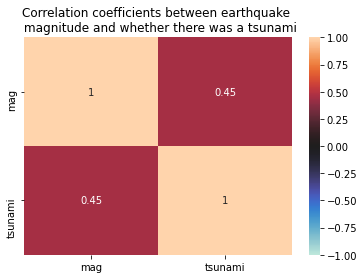

In [14]:
#1
#Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake 
#magnitude and whether there was a tsunami for earthquakes measured with the mb magnitude type.

%matplotlib inline
import pandas
import seaborn
import matplotlib.pyplot as plot

earthquakes = pandas.read_csv('ch6 data/earthquakes.csv')


seaborn.heatmap(earthquakes.query('magType == "mb"')[['mag','tsunami']].corr(), annot=True, center=0, vmin=-1, vmax=1
)

plot.title('Correlation coefficients between earthquake \n magnitude and whether there was a tsunami', y=1)

Text(0.5, 1.1, 'Box plot of Facebook volume traded and closing prices')

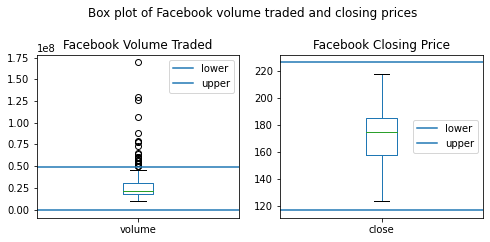

In [20]:
#2
#Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. 
#The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier.

facebook = pandas.read_csv('ch6 data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

cols = ['volume', 'close']
subset = facebook[cols]

quants = subset.quantile([0.25, 0.75])
quants.loc['iqr',:] = quants.loc[0.75,:] - quants.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Facebook Volume Traded', 'Facebook Closing Price'])
for ax, col in zip(axes, cols):
    stats = quants[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            label=name
        )
        ax.legend()
plot.suptitle('Box plot of Facebook volume traded and closing prices', y=1.1)



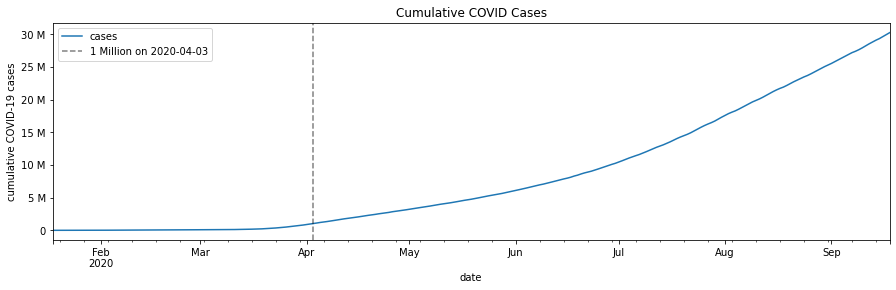

In [31]:
#3
#Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed vertical line on the date that it 
#surpassed 1 million. Be sure to format the tick labels on the y-axis accordingly.

from matplotlib.ticker import EngFormatter


covid = pandas.read_csv('ch6 data/covid19_cases.csv').assign(date=lambda x: pandas.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').sort_index()['2020-01-18':'2020-09-18']




cumulative = covid.groupby(pandas.Grouper(freq='1D')).sum().cases.cumsum()

ax = cumulative.plot(title='Cumulative COVID Cases', figsize=(15, 4))
ax.set_ylabel('cumulative COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

mill = cumulative[cumulative >= 1000000].index[0]
ax.axvline(mill, linestyle='dashed', color='k', alpha=0.5, label=f"1 Million on {mill.strftime('%Y-%m-%d')}")

ax.legend()

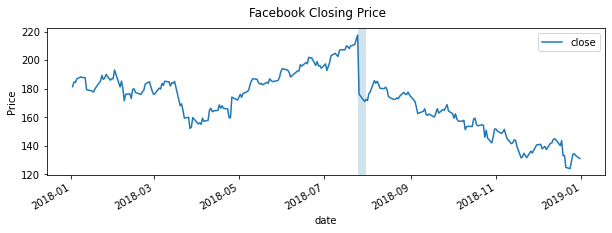

In [34]:
#4
#Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in 
#Facebook price on a line plot of the closing price.

facebook.close.plot(kind='line', figsize=(10, 3))
plot.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.2,
)
plot.ylabel('Price')
plot.suptitle('Facebook Closing Price')
plot.legend()

Text(0.5, 0.98, 'Facebook Closing Price, Annotated')

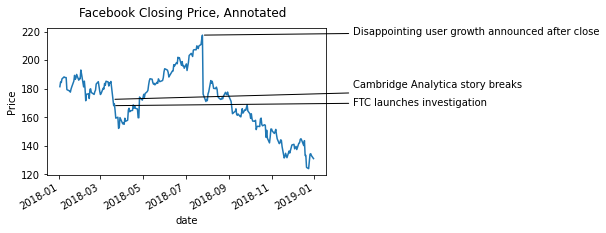

In [58]:
#5
#Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
#a) Disappointing user growth announced after close on July 25, 2018
#b) Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
#c) FTC launches investigation on March 20, 2018
import numpy

facebook.close.plot(kind='line', figsize=(5, 3))

annotate = [('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks \n', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')]



for text, date in annotate:
    y_value = facebook.close[date]
    plot.annotate(text, xy=(date, y_value),xytext=('2019-02-25', y_value),arrowprops=dict(arrowstyle='-'))
plot.ylabel('Price')
plot.suptitle('Facebook Closing Price, Annotated')



[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

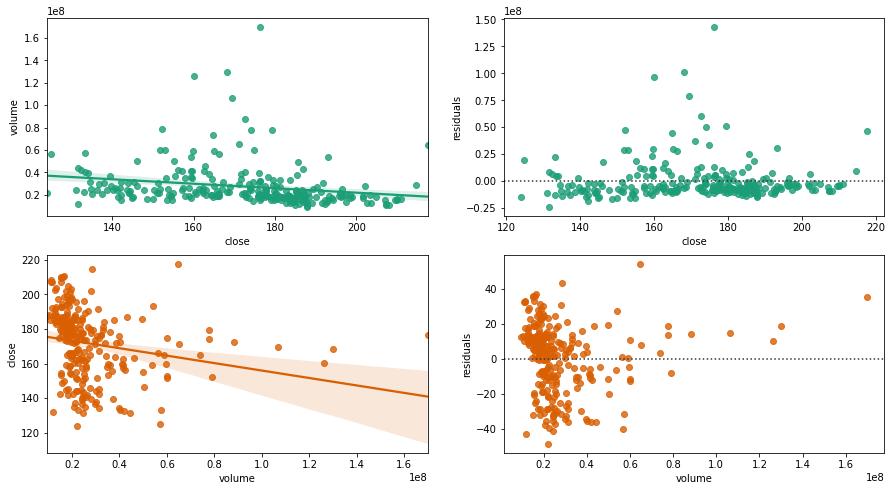

In [69]:
#6
#Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. 
#Remember, for this use case, we should pick a qualitative colormap or make our own.
from matplotlib import cm
import itertools

def reg_resid_plots(data):

    collums_count = data.shape[1]
    permutation_count = collums_count * (collums_count - 1)

    fig, ax = plot.subplots(permutation_count, 2, figsize=(15, 4 * permutation_count))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]):
        for subplot, func in zip(axes, (seaborn.regplot, seaborn.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == seaborn.residplot:
                subplot.set_ylabel('residuals')
    return fig.axes


reg_resid_plots(facebook[['close', 'volume']])